# Kmeans and geospatial analysis
## Alumno: Luis José Navarrete Baduy A01793919
## Materia: Ciencia de Datos
## Profesor: Maria de la Paz Rico
## Fecha de entrega: Nov/09/22

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 7.1 MB/s 
     |████████████████████████████████| 1.0 MB 46.6 MB/s 
     |████████████████████████████████| 1.7 MB 55.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 53.9 MB/s 
     |████████████████████████████████| 6.3 MB 38.5 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=8814d3d395f48a8cd0ba6077b6d934b9edb3022c7167b577ab3ec289f019c4f3
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=e6c7af0a0d84e8b6e6e6bdc079f1681f3e7f4fb1fd816bd8db72e3d323f68896
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

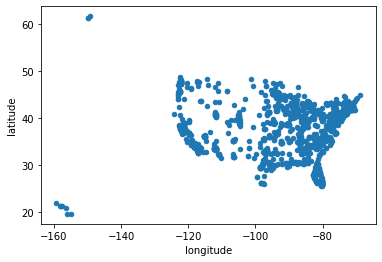

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

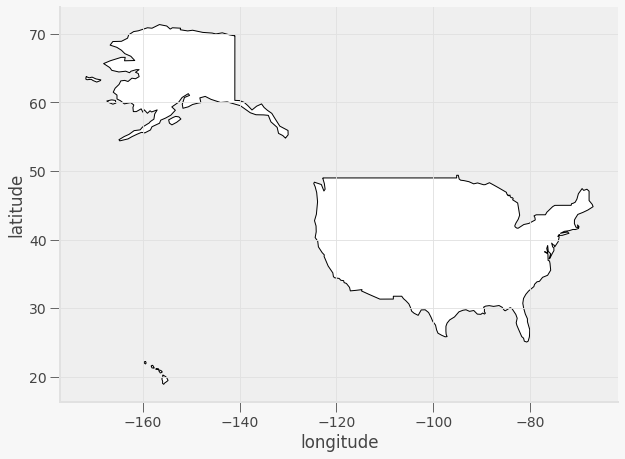

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

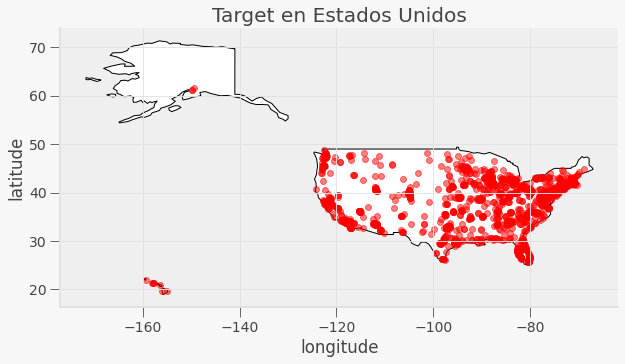

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [16]:
#tu codigo aquí
from sklearn.cluster import KMeans

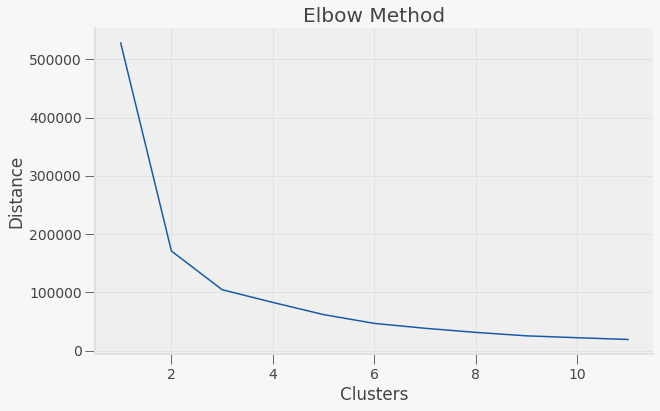

In [17]:
K = range(1,12)
distance=[]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(latlong)
    distance.append(kmeans.inertia_) 

plt.figure(figsize=(10, 6))
plt.plot(K, distance)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()

¿Como elegiste el número de almacenes?
Para determinar el numero optimo de clusters se puede ver que a apartir del cluster 3 la inertia empieza a disminuir de manera lineal, por lo que el codo (n cluster optimo) del grafico es 3

In [18]:
# Obtener la ubicacion optima de los almacenes
kmeans = KMeans(n_clusters=3, random_state=1)
kmean_p = kmeans.fit_predict(latlong) # Nos dice a que cluster pertenece cada ubicacion
countTotal = np.bincount(kmean_p)
print(countTotal) # Total de tiendas que va a surtir cada almacen
print(kmeans.cluster_centers_) # Latitud y longitud de los almacenes

[628 826 385]
[[  37.98006261  -93.3271723 ]
 [  37.789554    -78.56990807]
 [  37.48734203 -118.62447332]]


In [19]:
# Obtener las ciudades de cada almacen
from geopy.geocoders import Nominatim
centers = kmeans.cluster_centers_
geolocator = Nominatim(user_agent="kmeans_app")
locations = []
for i in range(len(centers)):
  location = geolocator.reverse(str(centers[i][0]) + "," + str(centers[i][1]))
  locations.append(location.address)
  print(f'Location {i+1}: {location.address}')

Location 1: Hickory County, Missouri, United States
Location 2: Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States
Location 3: Paradise Estates, Mono County, California, United States


In [22]:
almacenes = pd.DataFrame()
almacenes['LocationName'] = locations
almacenes[['Latitude', 'Longitude']] = centers
almacenes["Coordinates"] = list(zip(almacenes.Longitude, almacenes.Latitude))
almacenes["Coordinates"] = almacenes["Coordinates"].apply(Point)

,LocationName,Latitude,Longitude,Coordinates
0,"Hickory County, Missouri, United States",37.980063,-93.327172,POINT (-93.32717230430622 37.98006260590112)
1,"Langhorne Road, Totier Hills, Albemarle County...",37.789554,-78.569908,POINT (-78.56990807484885 37.789554004474006)
2,"Paradise Estates, Mono County, California, Uni...",37.487342,-118.624473,POINT (-118.62447331844157 37.48734203064935)


Utilizando la librería geopy se logró extraer el nombre de la locación utilizando la latitud y longitud en el caso del almacen en el condado de Hickory abastecerá a 628 tiendas, Langhorne Road a 826 y Paradise Estates a 385.

In [25]:
almacenes_gpd = gpd.GeoDataFrame(almacenes, geometry="Coordinates")
almacenes_gpd.head()

,LocationName,Latitude,Longitude,Coordinates
0,"Hickory County, Missouri, United States",37.980063,-93.327172,POINT (-93.32717 37.98006)
1,"Langhorne Road, Totier Hills, Albemarle County...",37.789554,-78.569908,POINT (-78.56991 37.78955)
2,"Paradise Estates, Mono County, California, Uni...",37.487342,-118.624473,POINT (-118.62447 37.48734)


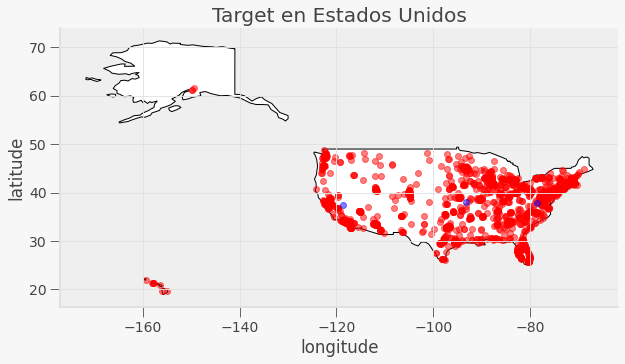

In [26]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)
almacenes_gpd.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

# ¿Qué librerías nos pueden ayudar a graficar este tipo de datos?

## Geopandas
GeoPandas es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python. GeoPandas amplía los tipos de datos utilizados por pandas para permitir operaciones espaciales en tipos geométricos. Las operaciones geométricas son realizadas por shapely. Geopandas depende además de fiona para el acceso a los archivos y de matplotlib para el trazado.

El objetivo de GeoPandas es facilitar el trabajo con datos geoespaciales en python. Combina las capacidades de pandas y shapely, proporcionando operaciones geoespaciales en pandas y una interfaz de alto nivel para múltiples geometrías para shapely. GeoPandas le permite realizar fácilmente operaciones en python que de otro modo requerirían una base de datos espacial como PostGIS.

## Ipyleaflet
Cree mapas interactivos dentro de un entorno de Jupyter Notebook. Ipyleaflet es una biblioteca puente que trae la capacidad de mapeo de Javascript de leaflet.js a Python. Se basa en Ipywidgets que proporcionan funciones de interfaz de usuario interactivas.

## Folium
Una alternativa a Ipyleaflet, Folium también es un puente a leaflet.js. La diferencia entre los dos es que Folium está diseñado para visualizaciones estáticas, mientras que Ipyleaflet crea widgets interactivos. Una característica útil de Folium es que proporciona una funcionalidad sencilla para exportar un mapa interactivo a HTML, lo que lo convierte en una herramienta útil en el desarrollo web.

# ¿Consideras importante que se grafique en un mapa?, ¿por qué?

Este tipo de análisis tiene mucha importancia en proyectos relacionados al clima e incluso al control de epidemias, con como geopandas o folium podemos ver el comportamiento de poblaciones y no solo un número en especifico.

# Conclusiones

En este trabajo se analizaron datos de tiendas target para poder establecer la cantidad optima de almacenes, este tipo de análisis puede ayudar a disminuir los costos de distribución maximizando el compromiso de entregar productos a tiempo. También se exploraron libreria relacionada a datos geoespaciales que nos permitieron ver la distribución de los almacenes en US, sin embargo, estas tienen diferentes aplicaciones en otros campos por lo que fueron de gran ayuda en el análisis.